In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=';')

#df['Dato'].value_counts().sort_index().plot.bar()
#plt.show()



In [13]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Avgangstid_p,Avg_tid_omr,Ledig
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,2021-10-12 10:53:00,Morgen,0.955357
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,2021-10-12 13:12:00,Dag,0.955357
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,2021-10-12 10:19:00,Morgen,0.946429
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,2021-10-12 13:51:00,Dag,0.910714
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,2021-10-12 07:33:00,Morgen,0.910714


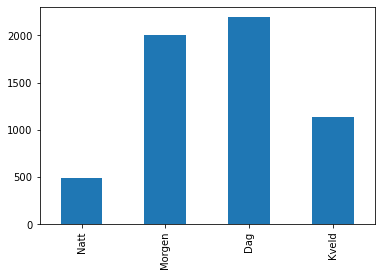

In [39]:
df['Avgangstid_p'] = pd.to_datetime(df.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, errors='coerce')

df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')

df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce')



a = df.assign(avg_tid = pd.cut(df.Avgangstid_p.dt.hour,[0,6,12,18,24],labels = ['Natt','Morgen','Dag','Kveld']))

df['Avg_tid_omr'] = a['avg_tid']

df['Avg_tid_omr'].value_counts().sort_index().plot.bar()
plt.show()




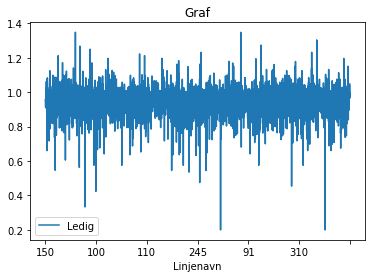

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Avgangstid_p,Avg_tid_omr,Ledig,forskinkelse,brukt_tid,planlagt_tid
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-10-12 10:53:00,2021-10-12 10:53:00,112,5,2021-10-12 10:53:00,Morgen,0.955357,53.0,6.0,0.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-10-12 13:12:00,2021-10-12 13:12:00,112,5,2021-10-12 13:12:00,Dag,0.955357,20.0,6.0,0.0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-10-12 10:19:00,2021-10-12 10:19:00,112,6,2021-10-12 10:19:00,Morgen,0.946429,86396.0,25.0,0.0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-10-12 13:51:00,2021-10-12 13:51:00,112,10,2021-10-12 13:51:00,Dag,0.910714,64.0,22.0,0.0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-10-12 07:33:00,2021-10-12 07:33:00,112,10,2021-10-12 07:33:00,Morgen,0.910714,73.0,40.0,0.0


In [70]:
ledig = (df['Kjøretøy_Kapasitet'].values - df['Passasjerer_Ombord'].values)/df['Kjøretøy_Kapasitet'].values
df['Ledig'] = ledig

df.plot.line(x='Linjenavn', y='Ledig', title='Graf')
plt.show()

df.head()

In [50]:
# planlagt tid fra og til holdeplass 
#planlagt_tid = (df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].values - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].values)
#df['planlagt_tid'] = planlagt_tid
#df['planlagt_tid'] = df['planlagt_tid'].apply(get_seconds)

In [7]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Avgangstid_p,Avg_tid_omr,Ledig
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,2021-10-12 10:53:00,Morgen,0.955357
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,2021-10-12 13:12:00,Dag,0.955357
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,2021-10-12 10:19:00,Morgen,0.946429
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,2021-10-12 13:51:00,Dag,0.910714
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,2021-10-12 07:33:00,Morgen,0.910714


In [26]:
def get_seconds(time_delta):
    return time_delta.seconds


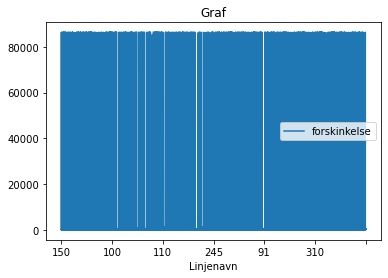

In [28]:
# forskinkelse 
forskinkelse = (df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].values - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].values)
df['forskinkelse'] = forskinkelse
df['forskinkelse'] = df['forskinkelse'].apply(get_seconds)
                

df.plot.line(x='Linjenavn', y='forskinkelse', title='Graf')
plt.show()

In [45]:
# brukt tid fra og til holdeplass
brukt_tid = (df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].values - df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].values)
df['brukt_tid'] = brukt_tid
df['brukt_tid'] = df['brukt_tid'].apply(get_seconds)



In [100]:
df3 =df

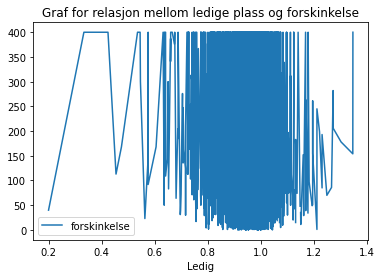

In [105]:
for index, row in df3.iterrows():
    if (row['forskinkelse'] > 400):
        df3.loc[index, 'forskinkelse']=400
        #row['forskinkelse'] = 500
      #  row['ledig_bool']=row['ledig_bool']+10
      #print(row['Avg_tid_omr'], row['Ledig'], row['forskinkelse']) 
        

df2=df3.sort_values('Ledig')
df2.plot.line(x='Ledig', y='forskinkelse', title='Graf for relasjon mellom ledige plass og forskinkelse')

plt.show()


        
#df['ledig_bool'].value_counts().plot.bar()
#plt.show()

In [106]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Avgangstid_p,Avg_tid_omr,Ledig,forskinkelse,brukt_tid,planlagt_tid,ledig_bool
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-10-12 10:53:00,112,5,2021-10-12 10:53:00,Morgen,0.955357,53.0,6.0,0.0,1
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-10-12 13:12:00,112,5,2021-10-12 13:12:00,Dag,0.955357,20.0,6.0,0.0,1
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-10-12 10:19:00,112,6,2021-10-12 10:19:00,Morgen,0.946429,400.0,25.0,0.0,1
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-10-12 13:51:00,112,10,2021-10-12 13:51:00,Dag,0.910714,64.0,22.0,0.0,1
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-10-12 07:33:00,112,10,2021-10-12 07:33:00,Morgen,0.910714,73.0,40.0,0.0,1
